## Environment Setup

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
%cd rapidsai-csp-utils
!git checkout 22.12-patch
%cd ..
!python rapidsai-csp-utils/colab/env-check.py
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 390, done.
remote: Counting objects: 100% (121/121), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 390 (delta 89), reused 51 (delta 51), pack-reused 269
Receiving objects: 100% (390/390), 107.11 KiB | 1.98 MiB/s, done.
Resolving deltas: 100% (191/191), done.
/content/rapidsai-csp-utils
Branch '22.12-patch' set up to track remote branch '22.12-patch' from 'origin'.
Switched to a new branch '22.12-patch'
/content
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 945.3 kB/s eta 0:00:00
Traceback (most recent call last):
  File "/content/rapidsai-csp-utils/colab/env-check.py", line 26, in <module>
    gpu_name = pynvml.nvmlDeviceGetName(pynvml.nvmlDeviceGetHandleByIndex(0)).decode('UTF-8')
AttributeError: 'str' object has no attribute 'decode'. Did you mean: 'encode'?
Traceback (most recent call last):
  File "/content/rapidsai-csp-utils/colab/pip-install.py", line 26, in <module>
    gpu_name 

In [3]:
%%bash
# Install the Merlin Framework
pip install -Uq git+https://github.com/NVIDIA-Merlin/models.git@release-23.04
pip install -Uq git+https://github.com/NVIDIA-Merlin/nvtabular.git@release-23.04
pip install -Uq git+https://github.com/NVIDIA-Merlin/core.git@release-23.04
# pip install -Uq git+https://github.com/NVIDIA-Merlin/system.git@release-23.04
# pip install -Uq git+https://github.com/NVIDIA-Merlin/dataloader.git@release-23.04
pip install -Uq git+https://github.com/NVIDIA-Merlin/Transformers4Rec.git@release-23.04
# pip install -Uq xgboost lightfm implicit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.8/140.8 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.0/122.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.5/985.5 kB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
merlin-dataloader 23.6.0 requires merlin-core<23.07,>=23.06, but you have merlin-core 23.4.0+4.gc5c9bc2 which is incompatible.


In [4]:
%%bash
pip install -q tensorflow-recommenders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.2/96.2 kB 1.4 MB/s eta 0:00:00


## Load Data
Reference
- https://github.com/NVIDIA-Merlin/models/blob/main/examples/02-Merlin-Models-and-NVTabular-integration.ipynb

In [1]:
import os
import shutil
import numpy as np
from nvtabular import ops
from merlin.schema.tags import Tags
import merlin.io
import merlin.models.tf as mm

import nvtabular as nvt
import tensorflow as tf


from os import path

# Get dataframe library - cudf or pandas
from merlin.core.dispatch import get_lib
pd = get_lib()

/usr/local/lib/python3.10/dist-packages/merlin/dtypes/mappings/triton.py:53: UserWarning: Triton dtype mappings did not load successfully due to an error: No module named 'tritonclient'
  warn(f"Triton dtype mappings did not load successfully due to an error: {exc.msg}")


In [2]:
DATA_DIR = os.environ.get(
    "DATA_DIR", os.path.expanduser("/content/drive/MyDrive/ml-twotower-model/data/")
)

In [3]:
import glob

USE_AUGMENTED_DATASET= False
DATA_VERSION = 'v4'

_TRAIN,_VALID,_TEST = ('train_aug', 'valid_aug', 'test_aug') if USE_AUGMENTED_DATASET else ('train', 'valid', 'test')

TRAIN_PATHS = sorted(glob.glob(os.path.join(DATA_DIR, _TRAIN + f'_{DATA_VERSION}', "*.parquet")))
VALID_PATHS = sorted(glob.glob(os.path.join(DATA_DIR, _VALID + f'_{DATA_VERSION}', "*.parquet")))
TEST_PATHS = sorted(glob.glob(os.path.join(DATA_DIR, _TEST + f'_{DATA_VERSION}', "*.parquet")))

# TRAIN_PATHS = sorted(glob.glob(os.path.join(DATA_DIR, _TRAIN , "*.parquet")))
# VALID_PATHS = sorted(glob.glob(os.path.join(DATA_DIR, _VALID , "*.parquet")))
# TEST_PATHS = sorted(glob.glob(os.path.join(DATA_DIR, _TEST , "*.parquet")))
TRAIN_PATHS, VALID_PATHS, TEST_PATHS

(['/content/drive/MyDrive/ml-twotower-model/data/train_v4/part_0.parquet'],
 ['/content/drive/MyDrive/ml-twotower-model/data/valid_v4/part_0.parquet'],
 ['/content/drive/MyDrive/ml-twotower-model/data/test_v4/part_0.parquet'])

In [4]:
train = merlin.io.Dataset(
    TRAIN_PATHS, engine="parquet"
)
valid = merlin.io.Dataset(
    VALID_PATHS, engine="parquet"
)

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


In [5]:
schema = train.schema.select_by_tag([
    Tags.ITEM_ID,
    Tags.USER_ID,
    Tags.ITEM,
    Tags.USER,
    # Tags.TARGET,
    ])
schema

,name,tags,dtype,is_list,is_ragged,properties.freq_threshold,properties.num_buckets,properties.start_index,properties.cat_path,properties.embedding_sizes.dimension,properties.embedding_sizes.cardinality,properties.max_size,properties.domain.min,properties.domain.max,properties.domain.name,properties.value_count.min,properties.value_count.max
0,movie_id,"(Tags.CATEGORICAL, Tags.ID, Tags.ITEM)","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,0.0,.//categories/unique.movie_id.parquet,102.0,1665.0,0.0,0,1664,movie_id,NaN,NaN
1,user_id,"(Tags.CATEGORICAL, Tags.ID, Tags.USER)","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,0.0,.//categories/unique.user_id.parquet,74.0,944.0,0.0,0,943,user_id,NaN,NaN
2,gender,"(Tags.CATEGORICAL, Tags.USER)","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,0.0,.//categories/unique.gender.parquet,16.0,3.0,0.0,0,2,gender,NaN,NaN
3,occupation,"(Tags.CATEGORICAL, Tags.USER)","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,0.0,.//categories/unique.occupation.parquet,16.0,22.0,0.0,0,21,occupation,NaN,NaN
4,genres,"(Tags.CATEGORICAL, Tags.ITEM)","DType(name='int64', element_type=<ElementType....",True,True,0.0,None,0.0,.//categories/unique.genres.parquet,16.0,20.0,0.0,0,19,genres,0.0,NaN


In [6]:
# schema = schema.excluding_by_name('genres')

In [7]:
train.head()

,movie_id,user_id,gender,occupation,genres,rating,movie_id_raw
0,121,13,1,1,[1],1.0,134
1,196,33,1,18,"[1, 4, 8]",1.0,31
2,451,901,1,1,"[2, 5]",1.0,354
3,48,88,2,8,"[2, 5]",0.0,202
4,330,30,1,4,[1],0.0,708


In [8]:
# missing from load
schema['movie_id'].tags._tags.add(Tags.ITEM_ID)
schema['user_id'].tags._tags.add(Tags.USER_ID)

In [9]:
# train = merlin.io.Dataset(train.to_ddf().compute().drop('rating', axis=1))
# valid = merlin.io.Dataset(valid.to_ddf().compute().drop('rating', axis=1))

In [10]:
# select only trainable features and exclude the target
train.schema = schema
valid.schema = schema

In [11]:
train.schema

,name,tags,dtype,is_list,is_ragged,properties.freq_threshold,properties.num_buckets,properties.start_index,properties.cat_path,properties.embedding_sizes.dimension,properties.embedding_sizes.cardinality,properties.max_size,properties.domain.min,properties.domain.max,properties.domain.name,properties.value_count.min,properties.value_count.max
0,movie_id,"(Tags.CATEGORICAL, Tags.ITEM_ID, Tags.ID, Tags...","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,0.0,.//categories/unique.movie_id.parquet,102.0,1665.0,0.0,0,1664,movie_id,NaN,NaN
1,user_id,"(Tags.CATEGORICAL, Tags.USER_ID, Tags.ID, Tags...","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,0.0,.//categories/unique.user_id.parquet,74.0,944.0,0.0,0,943,user_id,NaN,NaN
2,gender,"(Tags.CATEGORICAL, Tags.USER)","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,0.0,.//categories/unique.gender.parquet,16.0,3.0,0.0,0,2,gender,NaN,NaN
3,occupation,"(Tags.CATEGORICAL, Tags.USER)","DType(name='int64', element_type=<ElementType....",False,False,0.0,None,0.0,.//categories/unique.occupation.parquet,16.0,22.0,0.0,0,21,occupation,NaN,NaN
4,genres,"(Tags.CATEGORICAL, Tags.ITEM)","DType(name='int64', element_type=<ElementType....",True,True,0.0,None,0.0,.//categories/unique.genres.parquet,16.0,20.0,0.0,0,19,genres,0.0,NaN


In [12]:
assert len(train.schema.select_by_tag(Tags.TARGET).column_names) == 0

## Build Model
Reference
- https://github.com/NVIDIA-Merlin/models/blob/main/examples/05-Retrieval-Model.ipynb

### Model definition

In [13]:
def build_towers(schema=schema, tower_dim = (128, 64)):
    # create user schema using USER tag
    user_schema = schema.select_by_tag(Tags.USER)
    # create user (query) tower input block
    user_inputs = mm.InputBlockV2(user_schema)
    # create user (query) encoder block
    query = mm.Encoder(user_inputs, mm.MLPBlock(tower_dim, no_activation_last_layer=True))

    # create item schema using ITEM tag
    item_schema = schema.select_by_tag(Tags.ITEM)
    # create item (candidate) tower input block
    item_inputs = mm.InputBlockV2(item_schema)
    # create item (candidate) encoder block
    candidate = mm.Encoder(item_inputs, mm.MLPBlock(tower_dim, no_activation_last_layer=True))

    return mm.TwoTowerModelV2(query, candidate)


In [14]:
import matplotlib.pyplot as plt
import numpy as np

default_plot_metrics = {
    'Loss': 'loss',
    'Recall@10': 'recall_at_10',
    'Ndcg@10': 'ndcg_at_10',
    'AUC': 'auc'
}

def plot_metrics(train_history, val_history, metrics=default_plot_metrics, figsize=(18, 6)):
    # Create a figure and axis
    fig, ax = plt.subplots(1, len(metrics), figsize=figsize)
    metric_map = {}

    for i, (k, m) in enumerate(metrics.items()):
        train_metric = train_history[m]
        val_metric = val_history[m]
        epochs = np.arange(1, len(train_metric) + 1)

        # Plot metric
        ax[i].plot(epochs, train_metric, label=f'Train {k}', marker='o')
        ax[i].plot(epochs, val_metric, label=f'Validation {k}', marker='o')
        ax[i].set_xlabel('Epochs')
        ax[i].set_ylabel(k)
        ax[i].set_title(f'{k} Over Epochs')
        ax[i].legend()

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

In [15]:
from collections import defaultdict
def merge_model_history(*history):
    _history = defaultdict(list)
    for _h in history:
        h = _h.history
        for k,v in h.items():
            _history[k].extend(v)
    return _history


In [59]:
# hack block, as Merlin top_k_encoder is broken
from merlin.models.tf.loader import Loader
from merlin.schema import ColumnSchema, Schema, Tags
def batch_predict(
        self,
        dataset: merlin.io.Dataset,
        batch_size: int,
        output_schema = None,
        index = None,
        **kwargs,
    ) -> merlin.io.Dataset:
        """Batched prediction using Dask.
        Parameters
        ----------
        dataset: merlin.io.Dataset
            Dataset to predict on.
        batch_size: int
            Batch size to use for prediction.
        Returns
        -------
        merlin.io.Dataset
        """

        if index:
            if isinstance(index, ColumnSchema):
                index = Schema([index])
            elif isinstance(index, str):
                index = Schema([self.schema[index]])
            elif isinstance(index, Tags):
                index = self.schema.select_by_tag(index)
            elif not isinstance(index, Schema):
                raise ValueError(f"Invalid index: {index}")

            if len(index) != 1:
                raise ValueError("Only one column can be used as index")
            index = index.first.name

        if hasattr(dataset, "schema"):
            if not set(self.schema.column_names).issubset(set(dataset.schema.column_names)):
                raise ValueError(
                    f"Model schema {self.schema.column_names} does not match dataset schema"
                    + f" {dataset.schema.column_names}"
                )

        # Check if merlin-dataset is passed
        if hasattr(dataset, "to_ddf"):
            # hack
            dataset = dataset.to_ddf().compute()

        from merlin.models.tf.utils.batch_utils import TFModelEncode

        model_encode = TFModelEncode(self, batch_size=batch_size, **kwargs)
        encode_kwargs = {}
        if output_schema:
            encode_kwargs["filter_input_columns"] = output_schema.column_names
        # hack
        predictions = model_encode(dataset, **encode_kwargs)
        if index:
            predictions = predictions.set_index(index)

        return merlin.io.Dataset(predictions)

from merlin.models.tf.core.encoder import TopKEncoder
def to_top_k_encoder(
        model,
        candidates: merlin.io.Dataset = None,
        candidate_id=Tags.ITEM_ID,
        strategy = "brute-force-topk",
        k: int = 10,
        batch_size = 512
):
    output_schema = model.schema.select_by_tag(candidate_id)
    if candidate_id == Tags.ITEM_ID:
        candidate_encoder = model.candidate_encoder
        target_encoder =  model.query_encoder
    else:
        target_encoder = model.candidate_encoder
        candidate_encoder =  model.query_encoder

    # https://github.com/NVIDIA-Merlin/models/blob/stable/merlin/models/tf/models/base.py#L2479
    candidates_embeddings = batch_predict(
                candidate_encoder,
                candidates,
                batch_size=batch_size,
                output_schema=output_schema,
                index=candidate_id,
                output_concat_func=np.concatenate,
            )
    return TopKEncoder(
            target_encoder,
            topk_layer=strategy,
            k=k,
            candidates=candidates_embeddings,
            target=model.encoder._schema.select_by_tag(candidate_id).first.name,
        )

In [55]:
# Top-K evaluation
from merlin.models.utils.dataset import unique_rows_by_features
# from functools import cache


def get_candidates(data, candidate_id = Tags.ITEM):
    candidate_features = unique_rows_by_features(data, candidate_id)
    print(f'Candidate set rows:', candidate_features.num_rows)
    return candidate_features


def evaluate_model(model, ds, topk=10, batch_size=1024, target_id='movie_id', candidate_id = Tags.ITEM):
    candidate_features = get_candidates(ds, candidate_id)

    topk_model = to_top_k_encoder(model, candidate_features, k=topk, batch_size=batch_size, candidate_id=candidate_id)
    topk_model.compile(run_eagerly=False, metrics=[ tf.keras.metrics.AUC(),
                                             mm.TopKMetricsAggregator.default_metrics(top_ks=[topk])
                                            ])
    eval_loader = mm.Loader(ds, batch_size=batch_size).map(mm.ToTarget(schema, target_id))
    return topk_model.evaluate(eval_loader, return_dict=True)

### model_v3

In [109]:
# _tower_dim = (64, 128) # @param
_tower_dim = (64, 32) # @param
_learning_rate = 0.01 # @param
_batch_size = 128 # @param
_epochs = 50 # @param
_validation_batch_size = 256 # @param


In [49]:
model_v3 = build_towers(train.schema, tower_dim=_tower_dim)
TOP_K = [10]
model_v3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=_learning_rate),
                 run_eagerly=False, metrics=[ tf.keras.metrics.AUC(),
                                             mm.TopKMetricsAggregator.default_metrics(top_ks=TOP_K)
                                            ],
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True,
                                                            #  reduction=tf.keras.losses.Reduction.SUM # https://github.com/tensorflow/recommenders/blob/v0.7.3/tensorflow_recommenders/tasks/retrieval.py#L84
                                                             ),
)
history_v3 = []

#### model

In [110]:
history_v3.append(model_v3.fit(train, validation_data=valid, batch_size=_batch_size, epochs=_epochs, validation_batch_size=_validation_batch_size))

Epoch 1/50
549/549 [==============================] - 15s 26ms/step - loss: 4.2726 - auc_11: 0.6753 - recall_at_10: 0.3111 - mrr_at_10: 0.1197 - ndcg_at_10: 0.1639 - map_at_10: 0.1197 - precision_at_10: 0.0311 - regularization_loss: 0.0000e+00 - loss_batch: 4.2699 - val_loss: 4.7052 - val_auc_11: 0.5861 - val_recall_at_10: 0.2048 - val_mrr_at_10: 0.0704 - val_ndcg_at_10: 0.1013 - val_map_at_10: 0.0704 - val_precision_at_10: 0.0205 - val_regularization_loss: 0.0000e+00 - val_loss_batch: 4.9812
Epoch 2/50
549/549 [==============================] - 17s 28ms/step - loss: 4.2721 - auc_11: 0.6697 - recall_at_10: 0.3053 - mrr_at_10: 0.1176 - ndcg_at_10: 0.1610 - map_at_10: 0.1176 - precision_at_10: 0.0305 - regularization_loss: 0.0000e+00 - loss_batch: 4.2692 - val_loss: 4.6999 - val_auc_11: 0.5908 - val_recall_at_10: 0.2188 - val_mrr_at_10: 0.0722 - val_ndcg_at_10: 0.1059 - val_map_at_10: 0.0722 - val_precision_at_10: 0.0219 - val_regularization_loss: 0.0000e+00 - val_loss_batch: 5.0556
Epoc

#### eval

In [111]:
(model_v3.evaluate(train, batch_size=2048, return_dict=True),
 model_v3.evaluate(valid, batch_size=2048, return_dict=True))

8/8 [==============================] - 0s 27ms/step - loss: 7.4825 - auc_11: 0.5666 - recall_at_10: 0.0272 - mrr_at_10: 0.0195 - ndcg_at_10: 0.0212 - map_at_10: 0.0195 - precision_at_10: 0.0027 - regularization_loss: 0.0000e+00 - loss_batch: 7.3267


({'loss': 6.948401927947998,
  'auc_11': 0.6300323605537415,
  'recall_at_10': 0.05685023218393326,
  'mrr_at_10': 0.02361108735203743,
  'ndcg_at_10': 0.031310249119997025,
  'map_at_10': 0.02361108735203743,
  'precision_at_10': 0.0056850239634513855,
  'regularization_loss': 0.0,
  'loss_batch': 5.659359931945801},
 {'loss': 7.4824700355529785,
  'auc_11': 0.5665577054023743,
  'recall_at_10': 0.027484284713864326,
  'mrr_at_10': 0.017612211406230927,
  'ndcg_at_10': 0.019846687093377113,
  'map_at_10': 0.017612211406230927,
  'precision_at_10': 0.002748428611084819,
  'regularization_loss': 0.0,
  'loss_batch': 6.656989574432373})

In [118]:
evaluate_model(model_v3, train, topk=100)

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 5s 16ms/step - loss: 1.4384 - auc_44: 0.4153 - recall_at_100: 0.3081 - mrr_at_100: 0.0179 - ndcg_at_100: 0.0670 - map_at_100: 0.0179 - precision_at_100: 0.0031 - regularization_loss: 0.0000e+00 - loss_batch: 1.4375


{'loss': 1.4384310245513916,
 'auc_44': 0.41533172130584717,
 'recall_at_100': 0.3061736226081848,
 'mrr_at_100': 0.01771610602736473,
 'ndcg_at_100': 0.06640614569187164,
 'map_at_100': 0.01771610602736473,
 'precision_at_100': 0.003061736235395074,
 'regularization_loss': 0.0,
 'loss_batch': 1.3916001319885254}

In [119]:
evaluate_model(model_v3, valid, topk=100)

Candidate set rows: 1338


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 3s 27ms/step - loss: 0.9730 - auc_45: 0.4295 - recall_at_100: 0.2024 - mrr_at_100: 0.0082 - ndcg_at_100: 0.0402 - map_at_100: 0.0082 - precision_at_100: 0.0020 - regularization_loss: 0.0000e+00 - loss_batch: 1.0311


{'loss': 0.9729880094528198,
 'auc_45': 0.42949050664901733,
 'recall_at_100': 0.2028219848871231,
 'mrr_at_100': 0.00839446485042572,
 'ndcg_at_100': 0.04044663533568382,
 'map_at_100': 0.00839446485042572,
 'precision_at_100': 0.002028219634667039,
 'regularization_loss': 0.0,
 'loss_batch': 1.6384577751159668}

#### analysis

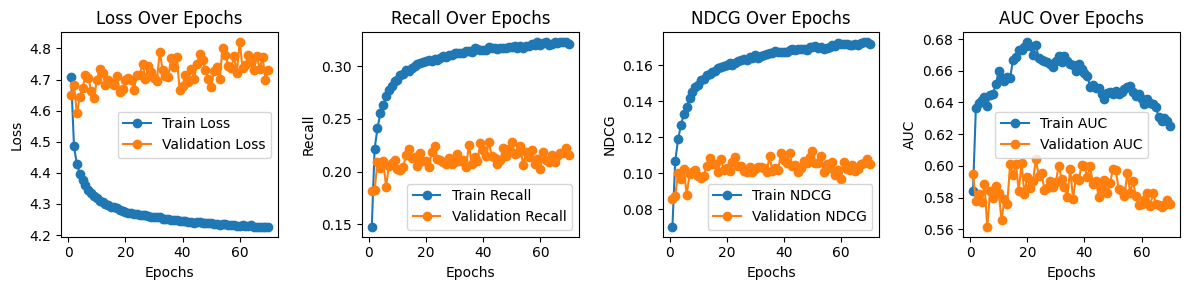

In [114]:
_history = merge_model_history(*history_v3)
AUC_TERM = [k for k in _history if k.startswith('auc')][0]
val_history = { k[4:]:v for k,v in _history.items() if k.startswith('val')}
plot_metrics(_history, val_history, default_plot_metrics | {'AUC': AUC_TERM})

### model_v4

In [134]:
# _tower_dim = (64, 128) # @param
# _tower_dim = (128, 64) # @param
_tower_dim = (512, 256) # @param

_learning_rate = 0.01 # @param
# _batch_size = 4096 # @param
_batch_size = 1024 # @param
_epochs = 150 # @param
_validation_batch_size = 256 # @param


In [135]:
model_v4 = build_towers(train.schema, tower_dim=_tower_dim)
TOP_K = [10]
model_v4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=_learning_rate),
                 run_eagerly=False, metrics=[ tf.keras.metrics.AUC(),
                                             mm.TopKMetricsAggregator.default_metrics(top_ks=TOP_K)
                                            ],
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True,
                                                            #  reduction=tf.keras.losses.Reduction.SUM # https://github.com/tensorflow/recommenders/blob/v0.7.3/tensorflow_recommenders/tasks/retrieval.py#L84
                                                             ),
)
history_v4 = []

#### model

In [136]:
history_v4.append(
    model_v4.fit(train, validation_data=valid, batch_size=_batch_size, epochs=_epochs, validation_batch_size=_validation_batch_size)
)

Epoch 1/150
69/69 [==============================] - 23s 223ms/step - loss: 6.8231 - auc_52: 0.5737 - recall_at_10: 0.0147 - mrr_at_10: 0.0052 - ndcg_at_10: 0.0074 - map_at_10: 0.0052 - precision_at_10: 0.0015 - regularization_loss: 0.0000e+00 - loss_batch: 6.8079 - val_loss: 6.7749 - val_auc_52: 0.5912 - val_recall_at_10: 0.0276 - val_mrr_at_10: 0.0092 - val_ndcg_at_10: 0.0134 - val_map_at_10: 0.0092 - val_precision_at_10: 0.0028 - val_regularization_loss: 0.0000e+00 - val_loss_batch: 6.3473
Epoch 2/150
69/69 [==============================] - 4s 58ms/step - loss: 6.5573 - auc_52: 0.6250 - recall_at_10: 0.0367 - mrr_at_10: 0.0124 - ndcg_at_10: 0.0180 - map_at_10: 0.0124 - precision_at_10: 0.0037 - regularization_loss: 0.0000e+00 - loss_batch: 6.5442 - val_loss: 6.6853 - val_auc_52: 0.5727 - val_recall_at_10: 0.0314 - val_mrr_at_10: 0.0106 - val_ndcg_at_10: 0.0154 - val_map_at_10: 0.0106 - val_precision_at_10: 0.0031 - val_regularization_loss: 0.0000e+00 - val_loss_batch: 6.2551
Epoch 

#### eval

In [137]:
(model_v4.evaluate(train, batch_size=2048, return_dict=True),
 model_v4.evaluate(valid, batch_size=2048, return_dict=True))

8/8 [==============================] - 0s 34ms/step - loss: 7.9884 - auc_52: 0.5406 - recall_at_10: 0.0186 - mrr_at_10: 0.0142 - ndcg_at_10: 0.0152 - map_at_10: 0.0142 - precision_at_10: 0.0019 - regularization_loss: 0.0000e+00 - loss_batch: 7.9317


({'loss': 6.627641201019287,
  'auc_52': 0.555304229259491,
  'recall_at_10': 0.10324492305517197,
  'mrr_at_10': 0.04888755455613136,
  'ndcg_at_10': 0.061546050012111664,
  'map_at_10': 0.04888755455613136,
  'precision_at_10': 0.010324492119252682,
  'regularization_loss': 0.0,
  'loss_batch': 5.146157741546631},
 {'loss': 7.988430976867676,
  'auc_52': 0.5405987501144409,
  'recall_at_10': 0.017319779843091965,
  'mrr_at_10': 0.01136185321956873,
  'ndcg_at_10': 0.012676406651735306,
  'map_at_10': 0.01136185321956873,
  'precision_at_10': 0.0017319780308753252,
  'regularization_loss': 0.0,
  'loss_batch': 7.687519073486328})

In [46]:
evaluate_model(model_v4, train, topk=100)

NameError: ignored

In [139]:
evaluate_model(model_v4, valid, topk=100)

Candidate set rows: 1338


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 4s 27ms/step - loss: 1.0925 - auc_54: 0.5072 - recall_at_100: 0.2049 - mrr_at_100: 0.0061 - ndcg_at_100: 0.0383 - map_at_100: 0.0061 - precision_at_100: 0.0020 - regularization_loss: 0.0000e+00 - loss_batch: 1.1328


{'loss': 1.0925264358520508,
 'auc_54': 0.5072149038314819,
 'recall_at_100': 0.20884044468402863,
 'mrr_at_100': 0.006274878513067961,
 'ndcg_at_100': 0.03909923881292343,
 'map_at_100': 0.006274878513067961,
 'precision_at_100': 0.002088404493406415,
 'regularization_loss': 0.0,
 'loss_batch': 1.5543676614761353}

#### analysis

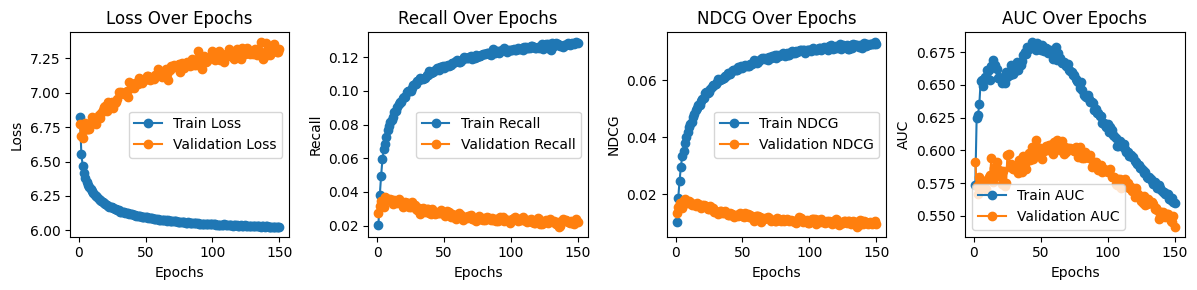

In [140]:
_history = merge_model_history(*history_v4)
AUC_TERM = [k for k in _history if k.startswith('auc')][0]
val_history = { k[4:]:v for k,v in _history.items() if k.startswith('val')}
plot_metrics(_history, val_history, default_plot_metrics | {'AUC': AUC_TERM})

### model_v5

In [32]:
# _tower_dim = (64, 128) # @param
# _tower_dim = (128, 64) # @param
_tower_dim = (512, 256) # @param

_learning_rate = 0.01 # @param
# _batch_size = 4096 # @param
_batch_size = 1024 # @param
_epochs = 30 # @param
_validation_batch_size = 256 # @param


In [33]:
model_v5 = build_towers(train.schema, tower_dim=_tower_dim)
TOP_K = [10]
model_v5.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=_learning_rate),
                 run_eagerly=False, metrics=[ tf.keras.metrics.AUC(),
                                             mm.TopKMetricsAggregator.default_metrics(top_ks=TOP_K)
                                            ],
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
)
history_v5 = []

#### model

In [34]:
history_v5.append(
    model_v5.fit(train, validation_data=valid, batch_size=_batch_size, epochs=_epochs, validation_batch_size=_validation_batch_size)
)

Epoch 1/30
69/69 [==============================] - 26s 279ms/step - loss: 6.8447 - auc_4: 0.5744 - recall_at_10: 0.0150 - mrr_at_10: 0.0049 - ndcg_at_10: 0.0072 - map_at_10: 0.0049 - precision_at_10: 0.0015 - regularization_loss: 0.0000e+00 - loss_batch: 6.8296 - val_loss: 6.7845 - val_auc_4: 0.6042 - val_recall_at_10: 0.0262 - val_mrr_at_10: 0.0091 - val_ndcg_at_10: 0.0130 - val_map_at_10: 0.0091 - val_precision_at_10: 0.0026 - val_regularization_loss: 0.0000e+00 - val_loss_batch: 6.5229
Epoch 2/30
69/69 [==============================] - 6s 75ms/step - loss: 6.5611 - auc_4: 0.6326 - recall_at_10: 0.0371 - mrr_at_10: 0.0125 - ndcg_at_10: 0.0182 - map_at_10: 0.0125 - precision_at_10: 0.0037 - regularization_loss: 0.0000e+00 - loss_batch: 6.5481 - val_loss: 6.7242 - val_auc_4: 0.5866 - val_recall_at_10: 0.0320 - val_mrr_at_10: 0.0108 - val_ndcg_at_10: 0.0156 - val_map_at_10: 0.0108 - val_precision_at_10: 0.0032 - val_regularization_loss: 0.0000e+00 - val_loss_batch: 6.2339
Epoch 3/30
6

#### eval

In [35]:
(model_v5.evaluate(train, batch_size=2048, return_dict=True),
 model_v5.evaluate(valid, batch_size=2048, return_dict=True))

8/8 [==============================] - 1s 42ms/step - loss: 7.6214 - auc_4: 0.5804 - recall_at_10: 0.0230 - mrr_at_10: 0.0166 - ndcg_at_10: 0.0181 - map_at_10: 0.0166 - precision_at_10: 0.0023 - regularization_loss: 0.0000e+00 - loss_batch: 7.5063


({'loss': 6.76745080947876,
  'auc_4': 0.6611053943634033,
  'recall_at_10': 0.08363009244203568,
  'mrr_at_10': 0.0377124547958374,
  'ndcg_at_10': 0.048381153494119644,
  'map_at_10': 0.0377124547958374,
  'precision_at_10': 0.008363010361790657,
  'regularization_loss': 0.0,
  'loss_batch': 5.3958516120910645},
 {'loss': 7.621395587921143,
  'auc_4': 0.5803676247596741,
  'recall_at_10': 0.023672595620155334,
  'mrr_at_10': 0.014991900883615017,
  'ndcg_at_10': 0.016968190670013428,
  'map_at_10': 0.014991900883615017,
  'precision_at_10': 0.0023672599345445633,
  'regularization_loss': 0.0,
  'loss_batch': 7.011460304260254})

In [39]:
evaluate_model(model_v5, train, topk=100)

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 3s 16ms/step - loss: 1.7575 - auc_7: 0.5122 - recall_at_100: 0.3747 - mrr_at_100: 0.0275 - ndcg_at_100: 0.0872 - map_at_100: 0.0275 - precision_at_100: 0.0037 - regularization_loss: 0.0000e+00 - loss_batch: 1.7606


{'loss': 1.757527232170105,
 'auc_7': 0.5121540427207947,
 'recall_at_100': 0.3728383779525757,
 'mrr_at_100': 0.02756620943546295,
 'ndcg_at_100': 0.08687572181224823,
 'map_at_100': 0.02756620943546295,
 'precision_at_100': 0.0037283841520547867,
 'regularization_loss': 0.0,
 'loss_batch': 1.9061037302017212}

In [37]:
evaluate_model(model_v5, valid, topk=100)

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1338


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 2s 20ms/step - loss: 1.0129 - auc_6: 0.5081 - recall_at_100: 0.1971 - mrr_at_100: 0.0069 - ndcg_at_100: 0.0380 - map_at_100: 0.0069 - precision_at_100: 0.0020 - regularization_loss: 0.0000e+00 - loss_batch: 1.0707


{'loss': 1.0129497051239014,
 'auc_6': 0.5081184506416321,
 'recall_at_100': 0.20462752878665924,
 'mrr_at_100': 0.007491062395274639,
 'ndcg_at_100': 0.039819762110710144,
 'map_at_100': 0.007491062395274639,
 'precision_at_100': 0.002046275185421109,
 'regularization_loss': 0.0,
 'loss_batch': 1.6741816997528076}

#### analysis

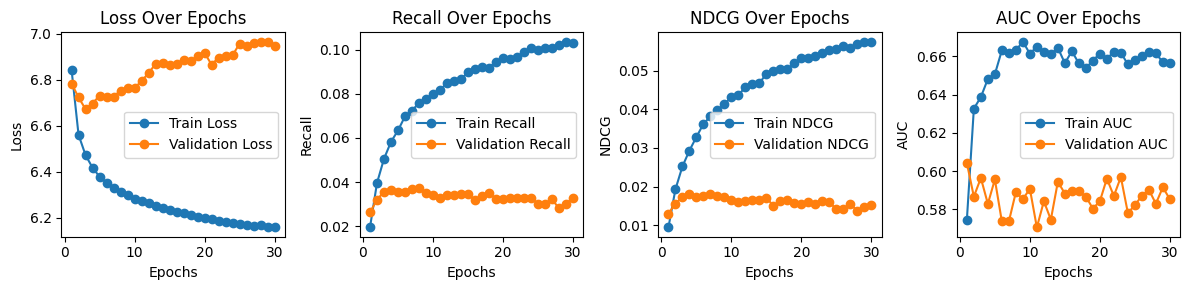

In [38]:
_history = merge_model_history(*history_v5)
AUC_TERM = [k for k in _history if k.startswith('auc')][0]
val_history = { k[4:]:v for k,v in _history.items() if k.startswith('val')}
plot_metrics(_history, val_history, default_plot_metrics | {'AUC': AUC_TERM})

### model_v6

In [18]:
# _tower_dim = (64, 128) # @param
# _tower_dim = (128, 64) # @param
_tower_dim = (64, 64) # @param

_learning_rate = 0.01 # @param
# _batch_size = 4096 # @param
_batch_size = 1024 # @param
_epochs = 30 # @param
_validation_batch_size = 256 # @param


In [19]:
model_v6 = build_towers(train.schema, tower_dim=_tower_dim)
TOP_K = [100, 10]
model_v6.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=_learning_rate),
                 run_eagerly=False, metrics=[ tf.keras.metrics.AUC(),
                                             mm.TopKMetricsAggregator.default_metrics(top_ks=TOP_K)
                                            ],
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
)
history_v6 = []

#### model

In [189]:
history_v6.append(
    model_v6.fit(train, validation_data=valid, batch_size=_batch_size, epochs=_epochs, validation_batch_size=_validation_batch_size)
)

Epoch 1/30
69/69 [==============================] - 5s 61ms/step - loss: 6.1435 - auc: 0.7201 - recall_at_100: 0.4348 - mrr_at_100: 0.0585 - ndcg_at_100: 0.1248 - map_at_100: 0.0585 - precision_at_100: 0.0043 - recall_at_10: 0.1098 - mrr_at_10: 0.0488 - ndcg_at_10: 0.0630 - map_at_10: 0.0488 - precision_at_10: 0.0110 - regularization_loss: 0.0000e+00 - loss_batch: 6.1285 - val_loss: 7.0127 - val_auc: 0.6117 - val_recall_at_100: 0.2402 - val_mrr_at_100: 0.0145 - val_ndcg_at_100: 0.0527 - val_map_at_100: 0.0145 - val_precision_at_100: 0.0024 - val_recall_at_10: 0.0298 - val_mrr_at_10: 0.0088 - val_ndcg_at_10: 0.0136 - val_map_at_10: 0.0088 - val_precision_at_10: 0.0030 - val_regularization_loss: 0.0000e+00 - val_loss_batch: 7.0699
Epoch 2/30
69/69 [==============================] - 5s 64ms/step - loss: 6.1376 - auc: 0.7165 - recall_at_100: 0.4345 - mrr_at_100: 0.0583 - ndcg_at_100: 0.1248 - map_at_100: 0.0583 - precision_at_100: 0.0043 - recall_at_10: 0.1123 - mrr_at_10: 0.0486 - ndcg_at

#### analysis

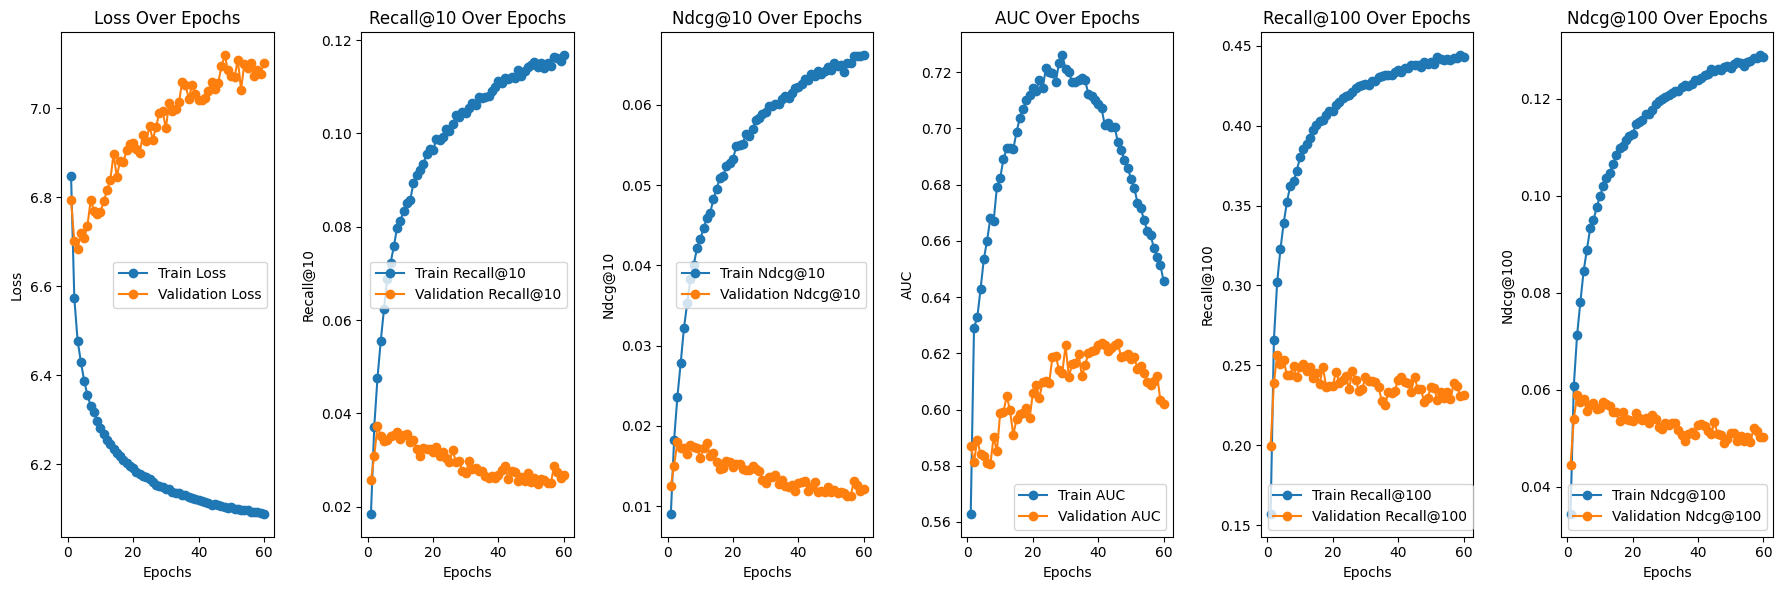

In [190]:
_history = merge_model_history(*history_v6)
AUC_TERM = [k for k in _history if k.startswith('auc')][0]
METRIC_AT = {'@'.join([k.split('_')[0].title(), k.split('_')[-1]]):k for k in _history if k.startswith('recall') or k.startswith('ndcg')}
val_history = { k[4:]:v for k,v in _history.items() if k.startswith('val')}
plot_metrics(_history, val_history, default_plot_metrics | {'AUC': AUC_TERM, **METRIC_AT})
# {'AUC': AUC_TERM, 'Recall@100': 'recall_at_100','NDCG@10': 'ndcg_at_10',}

#### eval

In [191]:
(model_v6.evaluate(train, batch_size=2048, return_dict=True),
 model_v6.evaluate(valid, batch_size=2048, return_dict=True))

8/8 [==============================] - 1s 64ms/step - loss: 7.7783 - auc: 0.5958 - recall_at_100: 0.1142 - mrr_at_100: 0.0164 - ndcg_at_100: 0.0326 - map_at_100: 0.0164 - precision_at_100: 0.0011 - recall_at_10: 0.0201 - mrr_at_10: 0.0140 - ndcg_at_10: 0.0154 - map_at_10: 0.0140 - precision_at_10: 0.0020 - regularization_loss: 0.0000e+00 - loss_batch: 7.6897


({'loss': 6.707321643829346,
  'auc': 0.639060378074646,
  'recall_at_100': 0.32308197021484375,
  'mrr_at_100': 0.050441160798072815,
  'ndcg_at_100': 0.09896378964185715,
  'map_at_100': 0.050441160798072815,
  'precision_at_100': 0.0032308197114616632,
  'recall_at_10': 0.09243326634168625,
  'mrr_at_10': 0.04344486445188522,
  'ndcg_at_10': 0.05483837425708771,
  'map_at_10': 0.04344486445188522,
  'precision_at_10': 0.009243326261639595,
  'regularization_loss': 0.0,
  'loss_batch': 5.272099494934082},
 {'loss': 7.7782793045043945,
  'auc': 0.5957744121551514,
  'recall_at_100': 0.12866123020648956,
  'mrr_at_100': 0.015090590342879295,
  'ndcg_at_100': 0.033981774002313614,
  'map_at_100': 0.015090590342879295,
  'precision_at_100': 0.0012866122415289283,
  'recall_at_10': 0.020262137055397034,
  'mrr_at_10': 0.012304134666919708,
  'ndcg_at_10': 0.014097444713115692,
  'map_at_10': 0.012304134666919708,
  'precision_at_10': 0.002026213565841317,
  'regularization_loss': 0.0,
  '

In [192]:
evaluate_model(model_v6, train, topk=100)

Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


ValueError: ignored

In [ ]:
evaluate_model(model_v6, valid, topk=100)

### model_v7

In [80]:
# _tower_dim = (64, 128) # @param
# _tower_dim = (128, 64) # @param
_tower_dim = (128, 128) # @param

_learning_rate = 0.01 # @param
# _batch_size = 4096 # @param
_batch_size = 64 # @param
_epochs = 20 # @param
_validation_batch_size = 256 # @param


In [81]:
model_v7 = build_towers(train.schema, tower_dim=_tower_dim)
TOP_K = [10]
model_v7.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=_learning_rate),
                 run_eagerly=False, metrics=[ tf.keras.metrics.AUC(),
                                             mm.TopKMetricsAggregator.default_metrics(top_ks=TOP_K)
                                            ],
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
)
history_v7 = []

#### model

In [82]:
history_v7.append(
    model_v7.fit(train, validation_data=valid, batch_size=_batch_size, epochs=_epochs, validation_batch_size=_validation_batch_size)
)

Epoch 1/20
1097/1097 [==============================] - 37s 29ms/step - loss: 4.0804 - auc_20: 0.5554 - recall_at_10: 0.1913 - mrr_at_10: 0.0585 - ndcg_at_10: 0.0889 - map_at_10: 0.0585 - precision_at_10: 0.0191 - regularization_loss: 0.0000e+00 - loss_batch: 4.0802 - val_loss: 4.0451 - val_auc_20: 0.5428 - val_recall_at_10: 0.2677 - val_mrr_at_10: 0.0858 - val_ndcg_at_10: 0.1276 - val_map_at_10: 0.0858 - val_precision_at_10: 0.0268 - val_regularization_loss: 0.0000e+00 - val_loss_batch: 3.7465
Epoch 2/20
1097/1097 [==============================] - 23s 21ms/step - loss: 3.9007 - auc_20: 0.6016 - recall_at_10: 0.3208 - mrr_at_10: 0.1029 - ndcg_at_10: 0.1530 - map_at_10: 0.1029 - precision_at_10: 0.0321 - regularization_loss: 0.0000e+00 - loss_batch: 3.9005 - val_loss: 3.9707 - val_auc_20: 0.5790 - val_recall_at_10: 0.3152 - val_mrr_at_10: 0.1045 - val_ndcg_at_10: 0.1530 - val_map_at_10: 0.1045 - val_precision_at_10: 0.0315 - val_regularization_loss: 0.0000e+00 - val_loss_batch: 3.9322


#### eval

In [83]:
(model_v7.evaluate(train, batch_size=2048, return_dict=True),
 model_v7.evaluate(valid, batch_size=2048, return_dict=True))

8/8 [==============================] - 1s 42ms/step - loss: 7.4135 - auc_20: 0.5244 - recall_at_10: 0.0210 - mrr_at_10: 0.0129 - ndcg_at_10: 0.0147 - map_at_10: 0.0129 - precision_at_10: 0.0021 - regularization_loss: 0.0000e+00 - loss_batch: 7.2331


({'loss': 7.166760444641113,
  'auc_20': 0.5659791827201843,
  'recall_at_10': 0.02707900106906891,
  'mrr_at_10': 0.00937355775386095,
  'ndcg_at_10': 0.013441509567201138,
  'map_at_10': 0.00937355775386095,
  'precision_at_10': 0.0027079000137746334,
  'regularization_loss': 0.0,
  'loss_batch': 5.896761894226074},
 {'loss': 7.413461685180664,
  'auc_20': 0.5244063138961792,
  'recall_at_10': 0.021532699465751648,
  'mrr_at_10': 0.011950535699725151,
  'ndcg_at_10': 0.014133432880043983,
  'map_at_10': 0.011950535699725151,
  'precision_at_10': 0.0021532701794058084,
  'regularization_loss': 0.0,
  'loss_batch': 6.457630634307861})

In [84]:
evaluate_model(model_v7, train, topk=100)

Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 4s 17ms/step - loss: 0.7721 - auc_21: 0.3655 - recall_at_100: 0.1638 - mrr_at_100: 0.0055 - ndcg_at_100: 0.0312 - map_at_100: 0.0055 - precision_at_100: 0.0016 - regularization_loss: 0.0000e+00 - loss_batch: 0.7705


{'loss': 0.7720529437065125,
 'auc_21': 0.3655455410480499,
 'recall_at_100': 0.16526594758033752,
 'mrr_at_100': 0.00571011146530509,
 'ndcg_at_100': 0.03162539005279541,
 'map_at_100': 0.00571011146530509,
 'precision_at_100': 0.0016526594990864396,
 'regularization_loss': 0.0,
 'loss_batch': 0.6964218020439148}

In [85]:
evaluate_model(model_v7, valid, topk=100)

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1338


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 2s 19ms/step - loss: 0.6503 - auc_22: 0.4368 - recall_at_100: 0.1306 - mrr_at_100: 0.0045 - ndcg_at_100: 0.0249 - map_at_100: 0.0045 - precision_at_100: 0.0013 - regularization_loss: 0.0000e+00 - loss_batch: 0.7078


{'loss': 0.650290846824646,
 'auc_22': 0.43683111667633057,
 'recall_at_100': 0.13902634382247925,
 'mrr_at_100': 0.004871107637882233,
 'ndcg_at_100': 0.026663023978471756,
 'map_at_100': 0.004871107637882233,
 'precision_at_100': 0.0013902633218094707,
 'regularization_loss': 0.0,
 'loss_batch': 1.308848261833191}

#### analysis

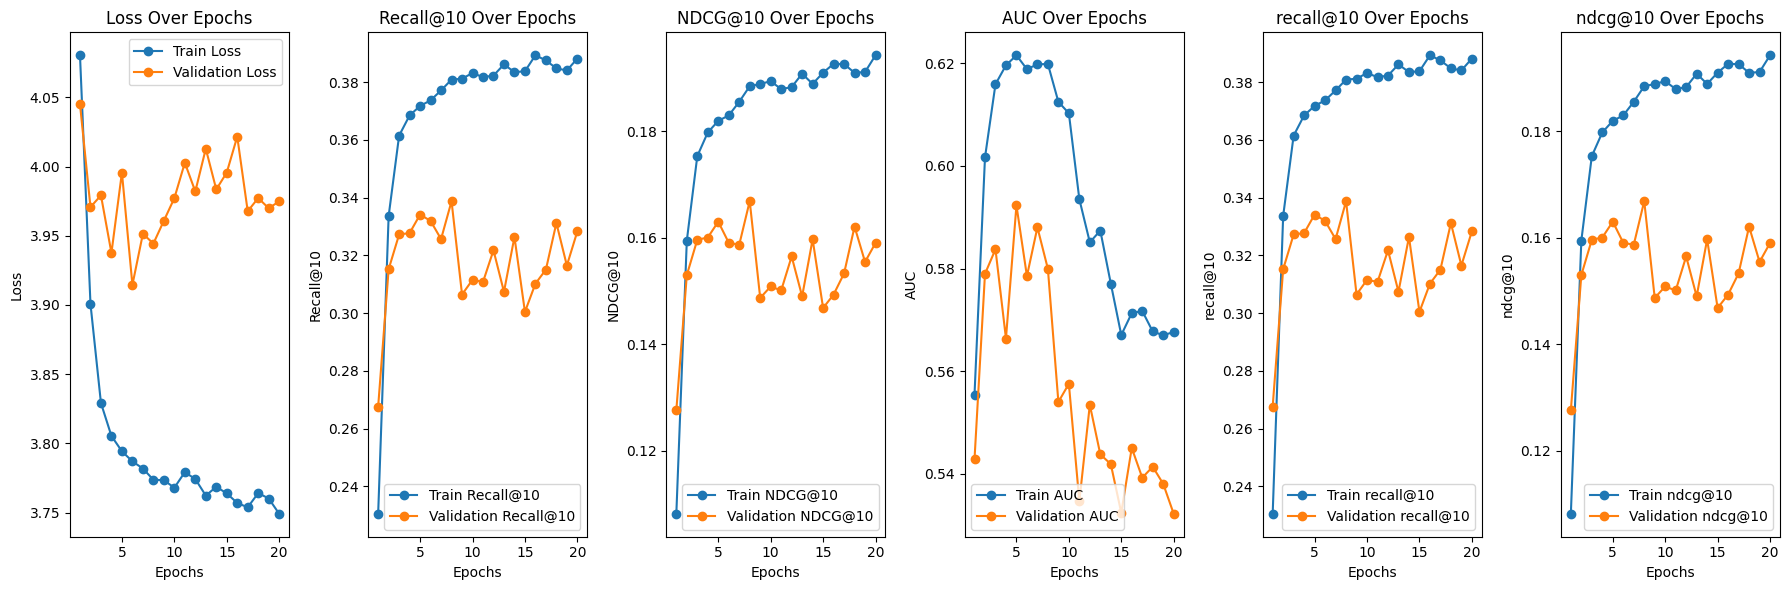

In [86]:
_history = merge_model_history(*history_v7)
AUC_TERM = [k for k in _history if k.startswith('auc')][0]
METRIC_AT = {'@'.join([k.split('_')[0], k.split('_')[-1]]):k for k in _history if k.startswith('recall') or k.startswith('ndcg')}
val_history = { k[4:]:v for k,v in _history.items() if k.startswith('val')}
plot_metrics(_history, val_history, default_plot_metrics | {'AUC': AUC_TERM, **METRIC_AT})
# {'AUC': AUC_TERM, 'Recall@100': 'recall_at_100','NDCG@10': 'ndcg_at_10',}

### model_v7

In [49]:
model_v7 = build_towers(tower_dim=64)
TOK_K = [10]
model_v7.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-2),
                 run_eagerly=False, metrics=[mm.TopKMetricsAggregator.default_metrics(top_ks=TOP_K)],
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
)

In [50]:
history_v7_1 = model_v7.fit(train, validation_data=valid, batch_size=32, epochs=15, validation_batch_size=256)

Epoch 1/15
2194/2194 [==============================] - 61s 25ms/step - loss: 3.4660 - recall_at_10: 0.3114 - mrr_at_10: 0.0921 - ndcg_at_10: 0.1422 - map_at_10: 0.0921 - precision_at_10: 0.0311 - regularization_loss: 0.0000e+00 - loss_batch: 3.4659 - val_loss: 3.4635 - val_recall_at_10: 0.3161 - val_mrr_at_10: 0.0930 - val_ndcg_at_10: 0.1438 - val_map_at_10: 0.0930 - val_precision_at_10: 0.0316 - val_regularization_loss: 0.0000e+00 - val_loss_batch: 2.2815
Epoch 2/15
2194/2194 [==============================] - 52s 23ms/step - loss: 3.4637 - recall_at_10: 0.3159 - mrr_at_10: 0.0934 - ndcg_at_10: 0.1441 - map_at_10: 0.0934 - precision_at_10: 0.0316 - regularization_loss: 0.0000e+00 - loss_batch: 3.4636 - val_loss: 3.4635 - val_recall_at_10: 0.3078 - val_mrr_at_10: 0.0899 - val_ndcg_at_10: 0.1398 - val_map_at_10: 0.0899 - val_precision_at_10: 0.0308 - val_regularization_loss: 0.0000e+00 - val_loss_batch: 2.2815
Epoch 3/15
2194/2194 [==============================] - 48s 22ms/step - loss

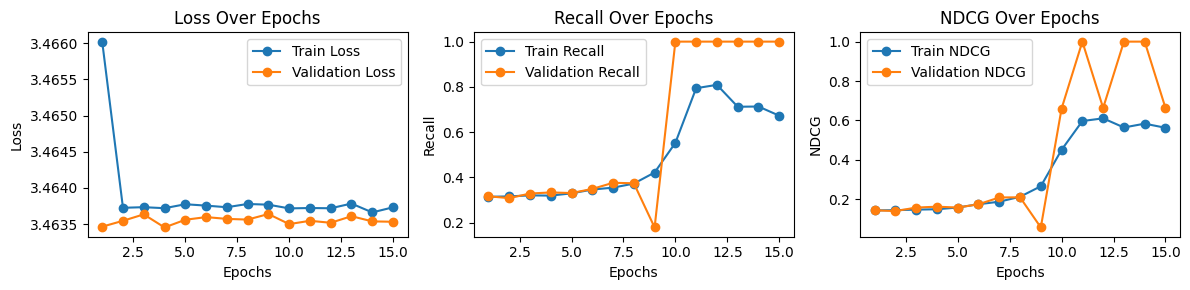

In [52]:
_history = merge_model_history(history_v7_1)
val_history = { k[4:]:v for k,v in _history.items() if k.startswith('val')}
plot_metrics(_history, val_history)

### model_v8

In [53]:
model_v8 = build_towers(tower_dim=256)
TOK_K = [10]
model_v8.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-2),
                 run_eagerly=False, metrics=[mm.TopKMetricsAggregator.default_metrics(top_ks=TOP_K)],
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
)

In [54]:
history_v8_1 = model_v8.fit(train, validation_data=valid, batch_size=32, epochs=15, validation_batch_size=256)

Epoch 1/15
2194/2194 [==============================] - 59s 24ms/step - loss: 3.4654 - recall_at_10: 0.3128 - mrr_at_10: 0.0924 - ndcg_at_10: 0.1427 - map_at_10: 0.0924 - precision_at_10: 0.0313 - regularization_loss: 0.0000e+00 - loss_batch: 3.4652 - val_loss: 3.4636 - val_recall_at_10: 0.3135 - val_mrr_at_10: 0.0924 - val_ndcg_at_10: 0.1429 - val_map_at_10: 0.0924 - val_precision_at_10: 0.0313 - val_regularization_loss: 0.0000e+00 - val_loss_batch: 2.2815
Epoch 2/15
2194/2194 [==============================] - 53s 24ms/step - loss: 4.6086 - recall_at_10: 0.3304 - mrr_at_10: 0.1152 - ndcg_at_10: 0.1642 - map_at_10: 0.1152 - precision_at_10: 0.0330 - regularization_loss: 0.0000e+00 - loss_batch: 4.6078 - val_loss: 3.4634 - val_recall_at_10: 6.6872e-04 - val_mrr_at_10: 6.8358e-05 - val_ndcg_at_10: 1.9490e-04 - val_map_at_10: 6.8358e-05 - val_precision_at_10: 6.6872e-05 - val_regularization_loss: 0.0000e+00 - val_loss_batch: 2.2815
Epoch 3/15
2194/2194 [==============================] - 

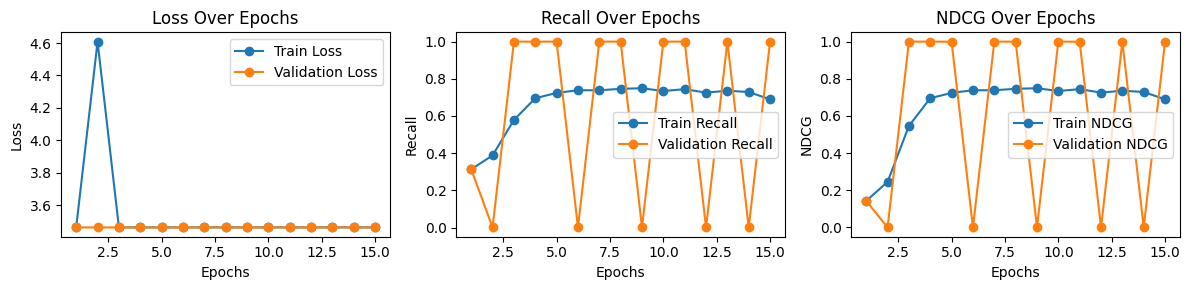

In [55]:
_history = merge_model_history(history_v8_1)
val_history = { k[4:]:v for k,v in _history.items() if k.startswith('val')}
plot_metrics(_history, val_history)

### model_v9

In [19]:
# _tower_dim = (64, 128) # @param
_tower_dim = (32, 16) # @param
_learning_rate = 0.01 # @param
_batch_size = 512 # @param
_epochs = 15 # @param
_validation_batch_size = 256 # @param


In [20]:
model_v9 = build_towers(train.schema, tower_dim=_tower_dim)
TOP_K = [10]
model_v9.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=_learning_rate),
                 run_eagerly=False, metrics=[ tf.keras.metrics.AUC(),
                                             mm.TopKMetricsAggregator.default_metrics(top_ks=TOP_K)
                                            ],
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True,
                                                            #  reduction=tf.keras.losses.Reduction.SUM # https://github.com/tensorflow/recommenders/blob/v0.7.3/tensorflow_recommenders/tasks/retrieval.py#L84
                                                             ),
)
history_v9 = []

#### model

In [35]:
history_v9.append(model_v9.fit(train, validation_data=valid, batch_size=_batch_size, epochs=_epochs, validation_batch_size=_validation_batch_size))

Epoch 1/15
138/138 [==============================] - 8s 51ms/step - loss: 5.5130 - auc: 0.6830 - recall_at_10: 0.1531 - mrr_at_10: 0.0639 - ndcg_at_10: 0.0846 - map_at_10: 0.0639 - precision_at_10: 0.0153 - regularization_loss: 0.0000e+00 - loss_batch: 5.4698 - val_loss: 6.1776 - val_auc: 0.5917 - val_recall_at_10: 0.0651 - val_mrr_at_10: 0.0197 - val_ndcg_at_10: 0.0301 - val_map_at_10: 0.0197 - val_precision_at_10: 0.0065 - val_regularization_loss: 0.0000e+00 - val_loss_batch: 5.7499
Epoch 2/15
138/138 [==============================] - 4s 23ms/step - loss: 5.5094 - auc: 0.6836 - recall_at_10: 0.1569 - mrr_at_10: 0.0651 - ndcg_at_10: 0.0863 - map_at_10: 0.0651 - precision_at_10: 0.0157 - regularization_loss: 0.0000e+00 - loss_batch: 5.4661 - val_loss: 6.2424 - val_auc: 0.5897 - val_recall_at_10: 0.0659 - val_mrr_at_10: 0.0202 - val_ndcg_at_10: 0.0307 - val_map_at_10: 0.0202 - val_precision_at_10: 0.0066 - val_regularization_loss: 0.0000e+00 - val_loss_batch: 5.8884
Epoch 3/15
138/138

In [36]:
model_v9.evaluate(train, batch_size=2048, return_dict=True), model_v9.evaluate(valid, batch_size=2048, return_dict=True)

8/8 [==============================] - 1s 37ms/step - loss: 7.6332 - auc: 0.5752 - recall_at_10: 0.0250 - mrr_at_10: 0.0185 - ndcg_at_10: 0.0200 - map_at_10: 0.0185 - precision_at_10: 0.0025 - regularization_loss: 0.0000e+00 - loss_batch: 7.4959


({'loss': 6.810889720916748,
  'auc': 0.6855550408363342,
  'recall_at_10': 0.076351098716259,
  'mrr_at_10': 0.0342133566737175,
  'ndcg_at_10': 0.04399328678846359,
  'map_at_10': 0.0342133566737175,
  'precision_at_10': 0.007635110057890415,
  'regularization_loss': 0.0,
  'loss_batch': 5.444518089294434},
 {'loss': 7.633225440979004,
  'auc': 0.5752266645431519,
  'recall_at_10': 0.024675672873854637,
  'mrr_at_10': 0.01596427522599697,
  'ndcg_at_10': 0.01793855056166649,
  'map_at_10': 0.01596427522599697,
  'precision_at_10': 0.0024675673339515924,
  'regularization_loss': 0.0,
  'loss_batch': 6.905421257019043})

In [107]:
evaluate_model(model_v9, train, topk=50)

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1561


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


69/69 [==============================] - 6s 33ms/step - loss: 0.8575 - auc_37: 0.4434 - recall_at_50: 0.2155 - mrr_at_50: 0.0239 - ndcg_at_50: 0.0598 - map_at_50: 0.0239 - precision_at_50: 0.0043 - regularization_loss: 0.0000e+00 - loss_batch: 0.8588


{'loss': 0.8574756383895874,
 'auc_37': 0.4434165358543396,
 'recall_at_50': 0.21393977105617523,
 'mrr_at_50': 0.02422141842544079,
 'ndcg_at_50': 0.05979929119348526,
 'map_at_50': 0.02422141842544079,
 'precision_at_50': 0.0042787957936525345,
 'regularization_loss': 0.0,
 'loss_batch': 0.922325074672699}

In [108]:
evaluate_model(model_v9, valid, topk=50)

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1338


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


15/15 [==============================] - 3s 22ms/step - loss: 0.3891 - auc_38: 0.4386 - recall_at_50: 0.0875 - mrr_at_50: 0.0055 - ndcg_at_50: 0.0203 - map_at_50: 0.0055 - precision_at_50: 0.0018 - regularization_loss: 0.0000e+00 - loss_batch: 0.4226


{'loss': 0.3890545070171356,
 'auc_38': 0.4385528564453125,
 'recall_at_50': 0.09275110065937042,
 'mrr_at_50': 0.005984900519251823,
 'ndcg_at_50': 0.021685531362891197,
 'map_at_50': 0.005984900519251823,
 'precision_at_50': 0.0018550221575424075,
 'regularization_loss': 0.0,
 'loss_batch': 0.7731633186340332}

#### result

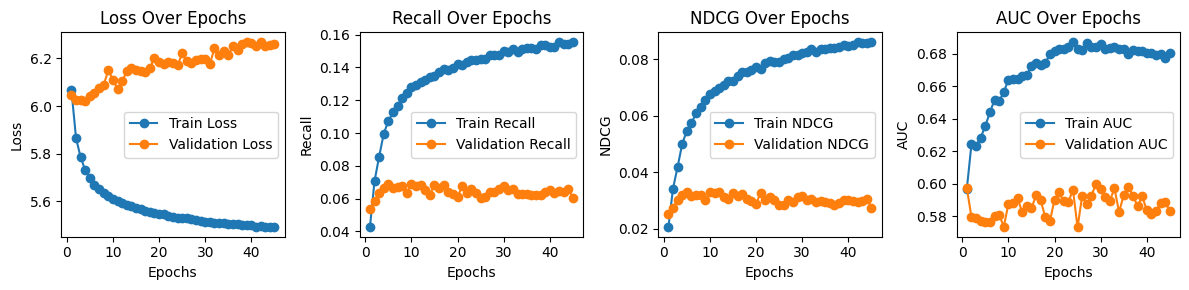

In [39]:
_history = merge_model_history(*history_v9)
AUC_TERM = [k for k in _history if k.startswith('auc')][0]
val_history = { k[4:]:v for k,v in _history.items() if k.startswith('val')}
plot_metrics(_history, val_history, default_plot_metrics | {'AUC': AUC_TERM})

### model_v10

In [42]:
_tower_dim = (128, 256) # @param
_learning_rate = 0.02 # @param
_batch_size = 256 # @param
_epochs = 15 # @param
_validation_batch_size = 256 # @param


#### model

In [43]:
model_v10 = build_towers(tower_dim=_tower_dim)
TOP_K = [10]
model_v10.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=_learning_rate),
                 run_eagerly=False, metrics=[mm.TopKMetricsAggregator.default_metrics(top_ks=TOP_K), tf.keras.metrics.AUC()],
                loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
)
history_v10 = []

In [44]:
history_v10.append(model_v10.fit(train, validation_data=valid, batch_size=_batch_size, epochs=_epochs, validation_batch_size=_validation_batch_size))

Epoch 1/15
275/275 [==============================] - 27s 70ms/step - loss: 5.4767 - recall_at_10: 0.0536 - mrr_at_10: 0.0172 - ndcg_at_10: 0.0255 - map_at_10: 0.0172 - precision_at_10: 0.0054 - auc_4: 0.5478 - regularization_loss: 0.0000e+00 - loss_batch: 5.4666 - val_loss: 5.4253 - val_recall_at_10: 0.0799 - val_mrr_at_10: 0.0251 - val_ndcg_at_10: 0.0376 - val_map_at_10: 0.0251 - val_precision_at_10: 0.0080 - val_auc_4: 0.5684 - val_regularization_loss: 0.0000e+00 - val_loss_batch: 4.6923
Epoch 2/15
275/275 [==============================] - 7s 25ms/step - loss: 5.3075 - recall_at_10: 0.0940 - mrr_at_10: 0.0290 - ndcg_at_10: 0.0439 - map_at_10: 0.0290 - precision_at_10: 0.0094 - auc_4: 0.6071 - regularization_loss: 0.0000e+00 - loss_batch: 5.2976 - val_loss: 5.3775 - val_recall_at_10: 0.0865 - val_mrr_at_10: 0.0263 - val_ndcg_at_10: 0.0401 - val_map_at_10: 0.0263 - val_precision_at_10: 0.0087 - val_auc_4: 0.5764 - val_regularization_loss: 0.0000e+00 - val_loss_batch: 4.6013
Epoch 3/1

In [45]:
history_v10.append(model_v10.fit(train, validation_data=valid, batch_size=_batch_size, epochs=_epochs, validation_batch_size=_validation_batch_size))

Epoch 1/15
275/275 [==============================] - 10s 34ms/step - loss: 5.5419 - recall_at_10: 0.6959 - mrr_at_10: 0.6916 - ndcg_at_10: 0.6925 - map_at_10: 0.6916 - precision_at_10: 0.0696 - auc_4: 0.5003 - regularization_loss: 0.0000e+00 - loss_batch: 5.5324 - val_loss: 5.5371 - val_recall_at_10: 0.9126 - val_mrr_at_10: 0.9088 - val_ndcg_at_10: 0.9096 - val_map_at_10: 0.9088 - val_precision_at_10: 0.0913 - val_auc_4: 0.5002 - val_regularization_loss: 0.0000e+00 - val_loss_batch: 4.5984
Epoch 2/15
275/275 [==============================] - 6s 20ms/step - loss: 5.5419 - recall_at_10: 0.7043 - mrr_at_10: 0.7004 - ndcg_at_10: 0.7013 - map_at_10: 0.7004 - precision_at_10: 0.0704 - auc_4: 0.5003 - regularization_loss: 0.0000e+00 - loss_batch: 5.5324 - val_loss: 5.5371 - val_recall_at_10: 0.1511 - val_mrr_at_10: 0.1449 - val_ndcg_at_10: 0.1462 - val_map_at_10: 0.1449 - val_precision_at_10: 0.0151 - val_auc_4: 0.5002 - val_regularization_loss: 0.0000e+00 - val_loss_batch: 4.5984
Epoch 3/1

#### result

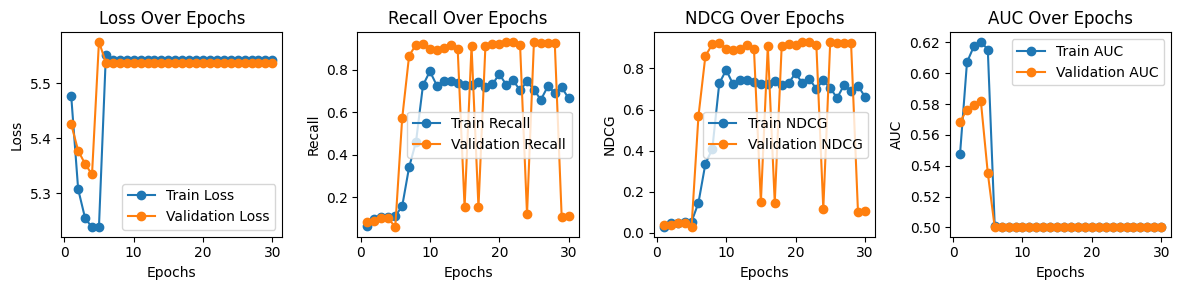

In [47]:
_history = merge_model_history(*history_v10)
val_history = { k[4:]:v for k,v in _history.items() if k.startswith('val')}
plot_metrics(_history, val_history, default_plot_metrics | {'AUC': 'auc_4'})

In [ ]:
_history = merge_model_history(*history_v10)
val_history = { k[4:]:v for k,v in _history.items() if k.startswith('val')}
plot_metrics(_history, val_history, default_plot_metrics | {'AUC': 'auc_2'})

## Evaluate the Model top-k results

In [89]:
from merlin.models.tf import PopularityBasedSamplerV2

1562.0

In [95]:
sampler = PopularityBasedSamplerV2(max_id=train.schema['movie_id'].properties['embedding_sizes']['cardinality'],
                         min_id=1, max_num_samples=10)
sampler.cal()

PopularityBasedSamplerV2()

In [ ]:
sampler.sample()

In [107]:
train_df = train.to_ddf().compute()
x,y = None, None
values = train_df[['movie_id']].value_counts().sort_index().values
x = values[0]
for y in values[1:]:
    if y > x:
        print('f')
    x = y


array([491, 453, 451, ...,   1,   1,   1])

In [ ]:
sampler.sample

### generate recommendations

In [25]:
valid_df = valid.to_ddf().compute()
train_df = train.to_ddf().compute()


In [63]:
def recommend_for_user_id(uid, data, topk_model):
    prepare_ds = merlin.io.Dataset(data[data['user_id'] == uid])
    # prepare_ds.schema = valid.schema
    eval_loader = mm.Loader(prepare_ds, batch_size=1)

    batch = next(iter(eval_loader))
    recs = topk_model(inputs=batch[0], return_dict=True)[1].numpy()[0]
    return recs

def recommend_for_movie_id(mid, data, topk_model):
    prepare_ds = merlin.io.Dataset(data[data['movie_id'] == mid])
    # prepare_ds.schema = valid.schema
    eval_loader = mm.Loader(prepare_ds, batch_size=1)

    batch = next(iter(eval_loader))
    recs = topk_model(inputs=batch[0], return_dict=True)[1].numpy()[0]
    return recs

In [27]:
candidate_features = get_candidates(valid)
topk = 100
batch_size=1024
model = model_v6

topk_model = to_top_k_encoder(model, candidate_features, k=topk, batch_size=batch_size)
topk_model.compile(run_eagerly=False, metrics=[
    mm.RecallAt(topk), mm.NDCGAt(topk), mm.MRRAt(topk)
])

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1387


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


In [62]:
# uids = range(1,10)

# for uid in uids:
#     watched_movies = valid_df[valid_df['user_id'] == uid]['movie_id'].unique()
#     new_movies = set(watched_movies).difference(train_df[train_df['user_id'] == uid]['movie_id'].unique())
#     # print(f'User {uid} watched {len(watched_movies)} movies')
#     recs = recommend_for_user_id(uid, valid_df, topk_model)
#     # if len(set(watched_movies).intersection(set(recs))) > 10:
#     print(f'UID: {uid},Recall', len(set(watched_movies).intersection(set(recs))))

In [38]:
cold_movies = list(set(valid_df['movie_id'].unique()).difference(set(train_df['movie_id'].unique())))
len(cold_movies)

50

In [48]:
cold_movie = cold_movies[2]
cold_movie

1414

In [49]:
user_watched_cold_movie = valid_df[valid_df['movie_id'] == cold_movie]['user_id']
user_watched_cold_movie

14704    1
Name: user_id, dtype: int64

In [64]:
user_features = get_candidates(valid, candidate_id=Tags.USER)
topk = 100
batch_size=1024
model = model_v6

topk_user_model = to_top_k_encoder(model, user_features, k=topk, batch_size=batch_size, candidate_id=Tags.USER_ID)
topk_user_model.compile(run_eagerly=False, metrics=[
    mm.RecallAt(topk), mm.NDCGAt(topk), mm.MRRAt(topk)
])

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 943


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


In [65]:
recommend_for_movie_id(cold_movie, valid_df, topk_user_model)

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


array([926, 647, 707, 914, 638, 774, 287, 362, 726, 662, 786, 400, 827,
       890, 906, 279, 881, 313, 887, 753, 834, 922, 758, 736, 539, 637,
       679, 731, 743, 367, 925, 357, 508, 428, 272, 177, 791, 533, 588,
       293, 873, 875,  99, 698, 447, 266, 763, 545, 847, 714, 844, 548,
       579, 672, 185, 750, 639, 204, 587, 302, 341, 474, 191, 397, 941,
       190, 412, 210, 134, 577, 634, 304, 571, 507, 390, 489, 394, 555,
       782, 620, 522, 241, 443, 894, 260, 651, 597, 217, 391, 364, 856,
       649, 316, 795, 228, 695, 484, 910, 697, 768], dtype=int32)

In [179]:
# for cmid in cold_movies:
#     recs = recommend_for_movie_id(cmid, valid_df, topk_user_model)
#     uid_who_watched = valid_df[valid_df['movie_id'] == cmid]['user_id']
#     uid_rec = set(recs).intersection(set(uid_who_watched))
#     print(f'MID: {cmid} People who watched {len(uid_who_watched)}, who were recommneded {len(uid_rec)}')

In [183]:
test = merlin.io.Dataset(
    TEST_PATHS, engine="parquet"
)
test_df = test.to_ddf().compute()

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


In [184]:
cold_movies = list(set(test_df['movie_id'].unique()).difference(set(train_df['movie_id'].unique())))
len(cold_movies)

72

In [185]:
candidate_features = get_candidates(test)
topk = 100
batch_size=1024
model = model_v6

topk_model = to_top_k_encoder(model, candidate_features, k=topk, batch_size=batch_size)
topk_model.compile(run_eagerly=False, metrics=[
    mm.RecallAt(topk), mm.NDCGAt(topk), mm.MRRAt(topk)
])

/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


Candidate set rows: 1432


/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/merlin/io/dataset.py:267: UserWarning: Initializing an NVTabular Dataset in CPU mode.This is an experimental feature with extremely limited support!
  warnings.warn(


In [186]:
eval_loader = mm.Loader(test, batch_size=2048, shuffle=False)
_iter = iter(eval_loader)

In [187]:
count_user_recommended = 0
from collections import defaultdict
cold_movie_count = defaultdict(set)
ran = 0

for batch, _ in _iter:
    r = topk_model(batch)[1].numpy()
    for cmid in cold_movies:
        mask = np.any(r == cmid, axis=1)
        cold_movie_count[cmid] |= set(tf.boolean_mask(batch['user_id'], mask).numpy())
    # count_user_recommended += np.sum(np.any(np.isin(r, cold_movies), axis=1))


In [188]:
for k,v in cold_movie_count.items():
    user_watched = set(test_df[test_df['movie_id'] == k]['user_id'])
    actual_watched = (test_df['movie_id'] == k).sum()
    print(k, len(v), len(user_watched.intersection(v)), actual_watched)

1664 57 0 1
1538 36 0 1
1539 118 0 1
1414 47 0 2
1655 47 0 1
1544 145 0 1
1547 45 0 1
1423 84 0 2
1552 43 0 1
1553 59 0 1
1426 83 0 3
1555 48 0 1
1558 45 0 1
1559 50 0 1
1561 98 0 1
1563 52 0 1
1436 54 0 2
1566 57 0 1
1569 57 0 1
1573 66 0 1
1447 96 0 3
1576 68 0 1
1580 70 0 1
1581 51 0 1
1582 93 0 1
1583 79 0 1
1457 56 0 2
1590 46 0 1
1336 46 0 3
1592 62 0 1
1594 47 0 1
1467 66 0 1
1468 48 0 2
1469 81 1 1
1470 67 0 1
1596 93 0 1
1602 60 0 1
1347 34 0 3
1604 118 0 1
1349 43 0 2
1609 58 0 1
1482 91 0 1
1611 57 0 1
1485 64 0 1
1486 50 0 1
1615 67 0 1
1616 20 0 1
1493 43 0 2
1497 61 0 2
1498 105 0 1
1371 164 0 4
1626 42 0 1
1628 26 0 1
1629 65 0 1
1380 79 0 2
1636 71 0 1
1639 81 0 1
1642 74 0 1
1517 56 0 1
1646 54 0 1
1647 105 0 1
1392 55 0 3
1395 96 0 3
1396 88 0 3
1652 46 0 1
1653 33 0 1
1654 90 0 1
1656 58 0 1
1658 37 0 1
1659 69 0 1
1661 122 0 1
1662 43 0 1


In [152]:
ran

8

In [128]:
valid_df['user_id'].nunique()

943

In [90]:
array_2d = np.array([[1, 2, 3, 1],
                     [4, 5, 6, 5],
                     [7, 8, 8, 9]])

# Set of values to count occurrences of
values_to_count = [5, 8]

# Count occurrences of the set in each row
np.sum(np.any(np.isin(array_2d, values_to_count), axis=1))

2

In [89]:
np.any(np.isin(array_2d, values_to_count), axis=1)

array([False,  True,  True])

In [76]:
(count_per_row).sum()

4

In [98]:
r = topk_model(batch[0])[1].numpy()
for i, u in enumerate(batch[0]['user_id'].numpy()):
    _m = set(valid_df[valid_df['user_id'] == u]['movie_id'])
    _r = set(r[i])

    print(len(_r.intersection(_m))/len(_r), len(_r.intersection(_m))/len(_m))

ValueError: ignored

## TMP

In [ ]:
# model = mm.DLRMModel(
#     train.schema,
#     embedding_dim=64,
#     bottom_block=mm.MLPBlock([128, 64]),
#     top_block=mm.MLPBlock([128, 64, 32]),
#     prediction_tasks=mm.BinaryOutput(
#         train.schema.select_by_tag(Tags.TARGET).column_names[0]
#     ),
# )
# model.compile(optimizer="adam")
# model.fit(train, batch_size=1024)

In [343]:
schema

,name,tags,dtype,is_list,is_ragged,properties.start_index,properties.cat_path,properties.max_size,properties.num_buckets,properties.freq_threshold,properties.embedding_sizes.cardinality,properties.embedding_sizes.dimension,properties.domain.min,properties.domain.max,properties.domain.name
0,movie_id,"(Tags.ITEM, Tags.ID, Tags.CATEGORICAL)","DType(name='int64', element_type=<ElementType....",False,False,0.0,.//categories/unique.movie_id.parquet,0.0,None,0.0,1562.0,98.0,0,1561,movie_id
1,user_id,"(Tags.USER, Tags.ID, Tags.CATEGORICAL)","DType(name='int64', element_type=<ElementType....",False,False,0.0,.//categories/unique.user_id.parquet,0.0,None,0.0,944.0,74.0,0,943,user_id
2,gender,"(Tags.USER, Tags.CATEGORICAL)","DType(name='int64', element_type=<ElementType....",False,False,0.0,.//categories/unique.gender.parquet,0.0,None,0.0,3.0,16.0,0,2,gender
3,occupation,"(Tags.USER, Tags.CATEGORICAL)","DType(name='int64', element_type=<ElementType....",False,False,0.0,.//categories/unique.occupation.parquet,0.0,None,0.0,22.0,16.0,0,21,occupation


In [344]:
# Define Model
import tensorflow as tf
QUERY_DROPOUT = 0.1
ITEM_DROPOUT = 0.1

model_v0 = mm.TwoTowerModel(
    schema,
    query_tower=mm.MLPBlock(
        [128,256],
        kernel_regularizer=tf.keras.regularizers.l1(3.9e-06),
        bias_regularizer=tf.keras.regularizers.l1(3.9e-06),
        no_activation_last_layer=True,
        # dropout=QUERY_DROPOUT
     ),
     item_tower=mm.MLPBlock(
         [128,256],
         kernel_regularizer=tf.keras.regularizers.l1(3.9e-06),
         bias_regularizer=tf.keras.regularizers.l1(3.9e-06),
         no_activation_last_layer=True,
        #  dropout=ITEM_DROPOUT
     ),
     samplers=[mm.InBatchSampler()] # default value
)

In [345]:
TOP_K = [10]

model_v0.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    run_eagerly=False,
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=[
        tf.keras.metrics.AUC(),
        mm.TopKMetricsAggregator.default_metrics(top_ks=TOP_K),

            #  tfr.keras.metrics.MRRMetric(topn=4)
             ],
)
model_v0.fit(
    train,
    validation_data=valid,
    schema=schema,
    batch_size=32,
    epochs=10,
    # shuffle = False
)

/usr/local/lib/python3.10/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer TruncatedNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Epoch 1/10


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '_fields'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '_fields'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
138/138 [==============================] - ETA: 0s - loss: 6.2522 - recall_at_10: 0.0212 - mrr_at_10: 0.0068 - ndcg_at_10: 0.0101 - map_at_10: 0.0068 - precision_at_10: 0.0021 - auc_23: 0.4996 - regularization_loss: 0.0159 - loss_batch: 6.2382

138/138 [==============================] - 34s 171ms/step - loss: 6.2522 - recall_at_10: 0.0212 - mrr_at_10: 0.0068 - ndcg_at_10: 0.0101 - map_at_10: 0.0068 - precision_at_10: 0.0021 - auc_23: 0.4996 - regularization_loss: 0.0158 - loss_batch: 6.2225 - val_loss: 6.2307 - val_recall_at_10: 0.0217 - val_mrr_at_10: 0.0069 - val_ndcg_at_10: 0.0103 - val_map_at_10: 0.0069 - val_precision_at_10: 0.0022 - val_auc_23: 0.5000 - val_regularization_loss: 0.0054 - val_loss_batch: 4.6038
Epoch 2/10
138/138 [==============================] - 7s 47ms/step - loss: 6.2393 - recall_at_10: 0.0214 - mrr_at_10: 0.0069 - ndcg_at_10: 0.0102 - map_at_10: 0.0069 - precision_at_10: 0.0021 - auc_23: 0.5031 - regularization_loss: 0.0044 - loss_batch: 6.2098 - val_loss: 6.2298 - val_recall_at_10: 0.0207 - val_mrr_at_10: 0.0061 - val_ndcg_at_10: 0.0095 - val_map_at_10: 0.0061 - val_precision_at_10: 0.0021 - val_auc_23: 0.5003 - val_regularization_loss: 0.0045 - val_loss_batch: 4.6036
Epoch 3/10
138/138 [===========

In [21]:
train_df = train.to_ddf().compute()
val_df = valid.to_ddf().compute()

In [19]:
train_df

,movie_id,user_id,gender,occupation,genres,rating,movie_id_raw
0,121,13,1,1,[1],1.0,134
1,196,33,1,18,"[1, 4, 8]",1.0,31
2,451,901,1,1,"[2, 5]",1.0,354
3,48,88,2,8,"[2, 5]",0.0,202
4,330,30,1,4,[1],0.0,708
...,...,...,...,...,...,...,...
70197,60,232,1,1,"[1, 13]",0.0,289
70198,89,80,1,1,"[4, 3, 9]",0.0,273
70199,180,253,1,11,[1],1.0,285
70200,507,111,1,15,[1],1.0,468


In [26]:
assert train_df['user_id'].nunique() == val_df['user_id'].nunique()

In [32]:
train_df['movie_id'].nunique(), val_df['movie_id'].nunique()

(1561, 1387)

In [31]:
len(set(train_df['movie_id'].unique()).intersection(set(val_df['movie_id'].unique())))

1337

In [33]:
# missing
len(set(train_df['movie_id'].unique()).difference(set(val_df['movie_id'].unique())))

224

In [34]:
# cold start
len(set(val_df['movie_id'].unique()).difference(set(train_df['movie_id'].unique())))

50

In [35]:
train_df['rating'].nunique()

2

In [48]:
schema

,name,tags,dtype,is_list,is_ragged,properties.max_size,properties.embedding_sizes.dimension,properties.embedding_sizes.cardinality,properties.freq_threshold,properties.num_buckets,properties.cat_path,properties.start_index,properties.domain.min,properties.domain.max,properties.domain.name,properties.value_count.min,properties.value_count.max
0,movie_id,"(Tags.ITEM, Tags.ID, Tags.CATEGORICAL)","DType(name='int64', element_type=<ElementType....",False,False,0.0,98.0,1562.0,0.0,NaN,.//categories/unique.movie_id.parquet,0.0,0.0,1561.0,movie_id,NaN,NaN
1,user_id,"(Tags.ID, Tags.CATEGORICAL, Tags.USER)","DType(name='int64', element_type=<ElementType....",False,False,0.0,74.0,944.0,0.0,NaN,.//categories/unique.user_id.parquet,0.0,0.0,943.0,user_id,NaN,NaN
2,gender,"(Tags.CATEGORICAL, Tags.USER)","DType(name='int64', element_type=<ElementType....",False,False,0.0,16.0,3.0,0.0,NaN,.//categories/unique.gender.parquet,0.0,0.0,2.0,gender,NaN,NaN
3,occupation,"(Tags.CATEGORICAL, Tags.USER)","DType(name='int64', element_type=<ElementType....",False,False,0.0,16.0,22.0,0.0,NaN,.//categories/unique.occupation.parquet,0.0,0.0,21.0,occupation,NaN,NaN
4,genres,"(Tags.ITEM, Tags.CATEGORICAL)","DType(name='int64', element_type=<ElementType....",True,True,0.0,16.0,20.0,0.0,NaN,.//categories/unique.genres.parquet,0.0,0.0,19.0,genres,0.0,NaN
5,rating,"(Tags.TARGET, Tags.BINARY_CLASSIFICATION)","DType(name='float32', element_type=<ElementTyp...",False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
model = mm.DLRMModel(
    train.schema,
    embedding_dim=64,
    bottom_block=mm.MLPBlock([128, 64]),
    top_block=mm.MLPBlock([128, 64, 32]),
    prediction_tasks=mm.BinaryOutput(
        train.schema.select_by_tag(Tags.TARGET).column_names[0]
    ),
)

In [64]:
batch_size = 1024
LR = 0.03

In [65]:
opt = tf.keras.optimizers.legacy.Adagrad(learning_rate=LR)
model.compile(optimizer=opt, run_eagerly=False,
              metrics=[tf.keras.metrics.AUC(), mm.TopKMetricsAggregator.default_metrics(top_ks=TOP_K)])


In [69]:
history = [history]

In [72]:
history.append(model.fit(train, validation_data=valid, batch_size=batch_size, epochs=50))

Epoch 1/50
69/69 [==============================] - 3s 29ms/step - loss: 0.5212 - auc_7: 0.8074 - recall_at_10: 0.9569 - mrr_at_10: 0.9692 - ndcg_at_10: 0.9564 - map_at_10: 0.9281 - precision_at_10: 0.9569 - regularization_loss: 0.0000e+00 - loss_batch: 0.5201 - val_loss: 0.5999 - val_auc_7: 0.7578 - val_recall_at_10: 0.9600 - val_mrr_at_10: 1.0000 - val_ndcg_at_10: 0.9681 - val_map_at_10: 0.9417 - val_precision_at_10: 0.9600 - val_regularization_loss: 0.0000e+00 - val_loss_batch: 0.6320
Epoch 2/50
69/69 [==============================] - 3s 29ms/step - loss: 0.5204 - auc_7: 0.8081 - recall_at_10: 0.9652 - mrr_at_10: 0.9786 - ndcg_at_10: 0.9658 - map_at_10: 0.9421 - precision_at_10: 0.9652 - regularization_loss: 0.0000e+00 - loss_batch: 0.5193 - val_loss: 0.6002 - val_auc_7: 0.7576 - val_recall_at_10: 0.9667 - val_mrr_at_10: 1.0000 - val_ndcg_at_10: 0.9729 - val_map_at_10: 0.9510 - val_precision_at_10: 0.9667 - val_regularization_loss: 0.0000e+00 - val_loss_batch: 0.6333
Epoch 3/50
69/

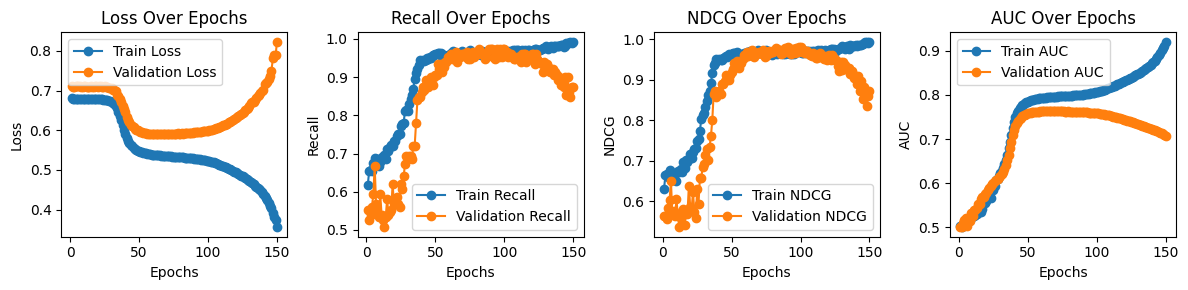

In [73]:
_history = merge_model_history(*history)
val_history = { k[4:]:v for k,v in _history.items() if k.startswith('val')}
plot_metrics(_history, val_history, default_plot_metrics | {'AUC': 'auc_7'})

In [ ]:
model_v9.candidate_embedding